In [4]:
import os 
import calendar 
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parellel_coordinates 
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt

In [5]:
df = pd.read_csv("BostonHousing.csv")
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [6]:
df_copy = df

In [7]:
# Create a new column with a boolean mask
df_copy['cat.medv'] = df['medv'] >= 30

In [8]:
df_copy.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,cat.medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,True
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,True
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,True


In [19]:
df_copy["cat.medv"] = df_copy["cat.medv"].astype("int") #Then this boolean mask needs to be converted into int

In [20]:
df_copy.head(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,cat.medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1


In [21]:
df = df_copy

In [22]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,cat.medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [23]:
mean_value = df.medv.median() #Finding the mean value.

In [24]:
print(mean_value)

21.2


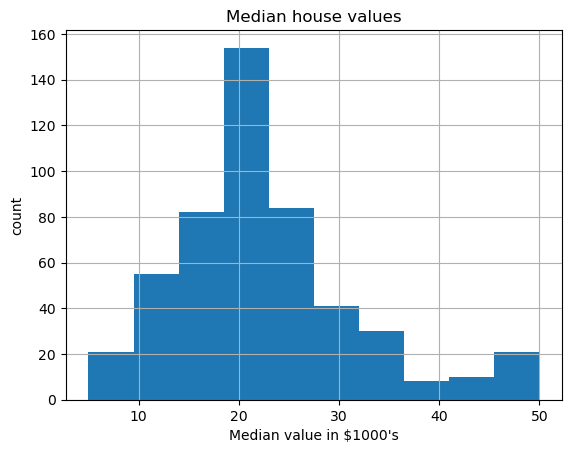

In [41]:
#Building a Histogram
df.hist(column = "medv")
plt.title("Median house values")
plt.xlabel("Median value in $1000's")
plt.ylabel("count")
plt.show()

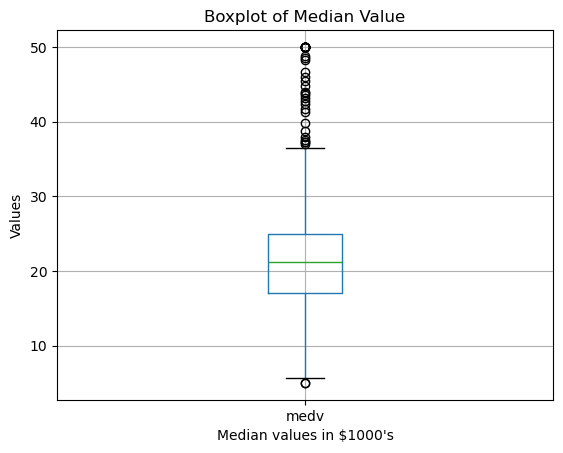

In [31]:
# Building a boxplot
df.boxplot(column = "medv")
plt.title("Boxplot of Median Value")
plt.xlabel("Median values in $1000's")
plt.ylabel("Values")
plt.show()

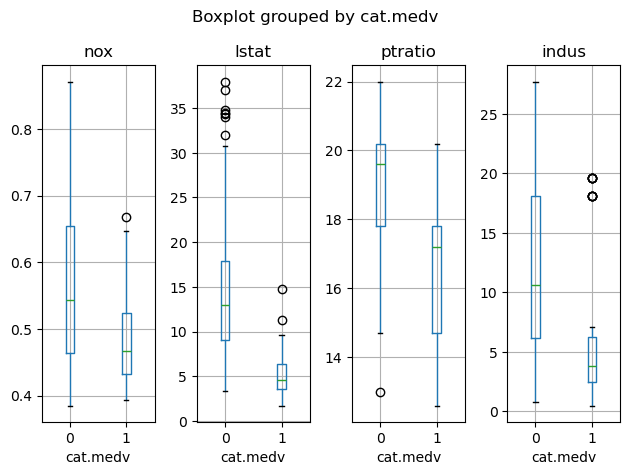

In [36]:
#making it easier for the group analysis of nox, lstat, ptratio and indus and everything is grouped by cat.medv

fig, axes = plt.subplots(nrows = 1, ncols = 4)
df.boxplot(column = "nox", by = "cat.medv", ax = axes[0])
df.boxplot(column = "lstat", by = "cat.medv", ax = axes[1])
df.boxplot(column = "ptratio", by = "cat.medv", ax = axes[2])
df.boxplot(column = "indus", by = "cat.medv", ax = axes[3])

for ax in axes:
    ax.set_xlabel("cat.medv")


plt.tight_layout()

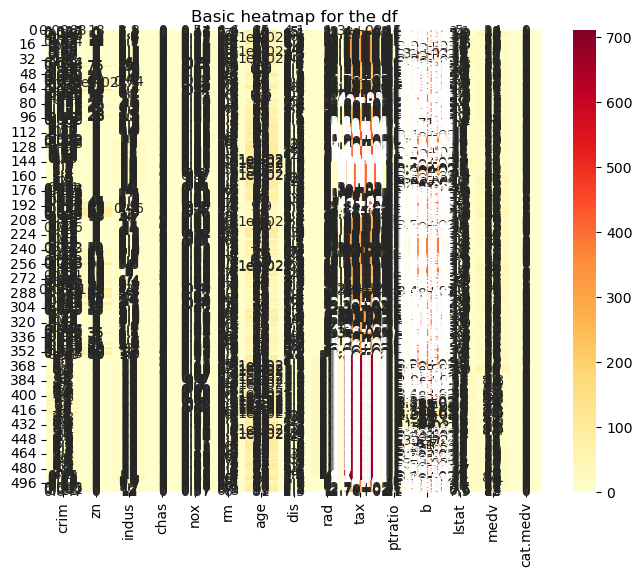

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot = True, cmap='YlOrRd')
plt.title("Basic heatmap for the df")
plt.show()

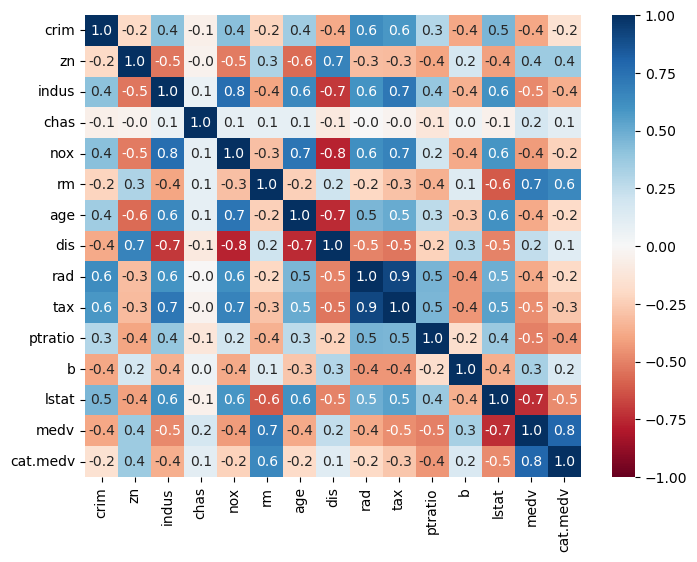

In [59]:
plt.figure(figsize = (8,6))
corr = df.corr()
# To compute pairwise correlation of columns, excluding NA/null values.
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, cmap='RdBu', vmin = -1, vmax = 1, fmt = ".1f")
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, cmap='YlOrRd', vmin = -1, vmax = 1, fmt = ".1f")
plt.show()
#plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

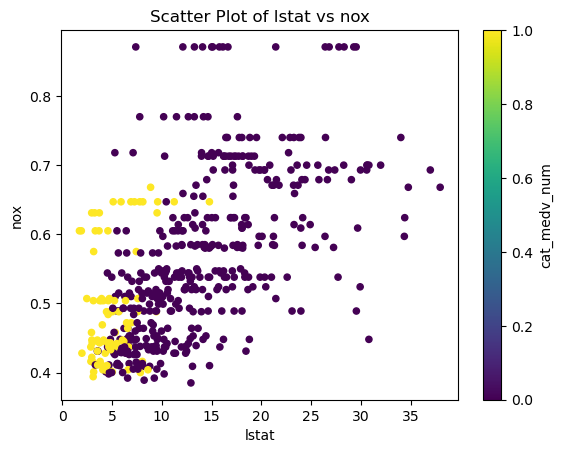

In [66]:
# Assuming 'cat.medv' is a column in your DataFrame 'df'
df['cat_medv_num'] = df['cat.medv'].astype(int)

df.plot.scatter(x="lstat", y="nox", c="cat_medv_num", cmap="viridis")
plt.xlabel("lstat")
plt.ylabel("nox")
plt.title("Scatter Plot of lstat vs nox")
plt.colorbar(label="cat.medv")
plt.show()

In [69]:
df = df.rename(columns={"cat.medv": "cat_medv"})

In [70]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,cat_medv,cat_medv_num
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,1


In [74]:
df = df.drop(columns = "cat_medv_num")

In [77]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'cat_medv'],
      dtype='object')

In [78]:
# Let's rescale the dataframe
df_copy = (df - df.min())/(df.max()-df.min())

In [79]:
df_copy.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,cat_medv
0,0.0,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.0,0.208015,0.287234,1.0,0.08968,0.422222,0.0


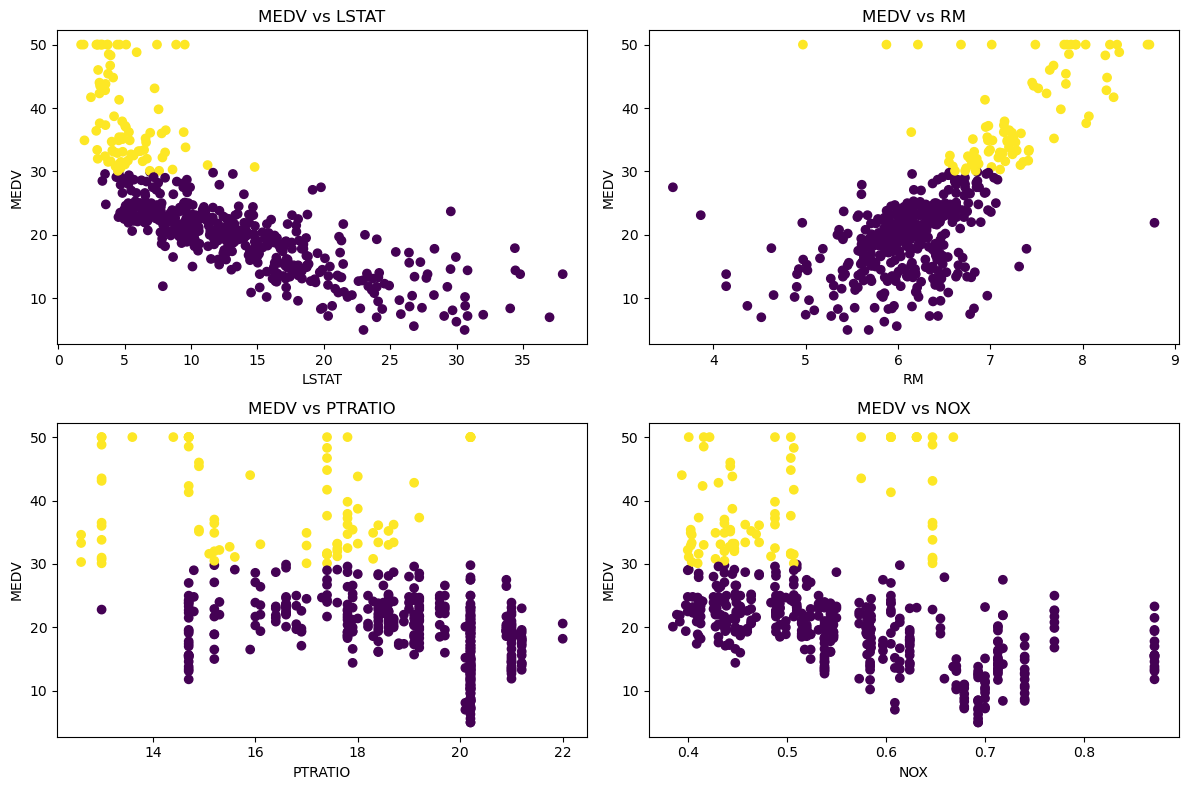

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Scatter plot of MEDV vs LSTAT
axes[0, 0].scatter(df['lstat'], df['medv'], c=df['cat_medv'], cmap='viridis')
axes[0, 0].set_xlabel('LSTAT')
axes[0, 0].set_ylabel('MEDV')
axes[0, 0].set_title('MEDV vs LSTAT')

# Scatter plot of MEDV vs RM
axes[0, 1].scatter(df['rm'], df['medv'], c=df['cat_medv'], cmap='viridis')
axes[0, 1].set_xlabel('RM')
axes[0, 1].set_ylabel('MEDV')
axes[0, 1].set_title('MEDV vs RM')

# Scatter plot of MEDV vs PTRATIO
axes[1, 0].scatter(df['ptratio'], df['medv'], c=df['cat_medv'], cmap='viridis')
axes[1, 0].set_xlabel('PTRATIO')
axes[1, 0].set_ylabel('MEDV')
axes[1, 0].set_title('MEDV vs PTRATIO')

# Scatter plot of MEDV vs NOX
axes[1, 1].scatter(df['nox'], df['medv'], c=df['cat_medv'], cmap='viridis')
axes[1, 1].set_xlabel('NOX')
axes[1, 1].set_ylabel('MEDV')
axes[1, 1].set_title('MEDV vs NOX')

plt.tight_layout()
plt.show()